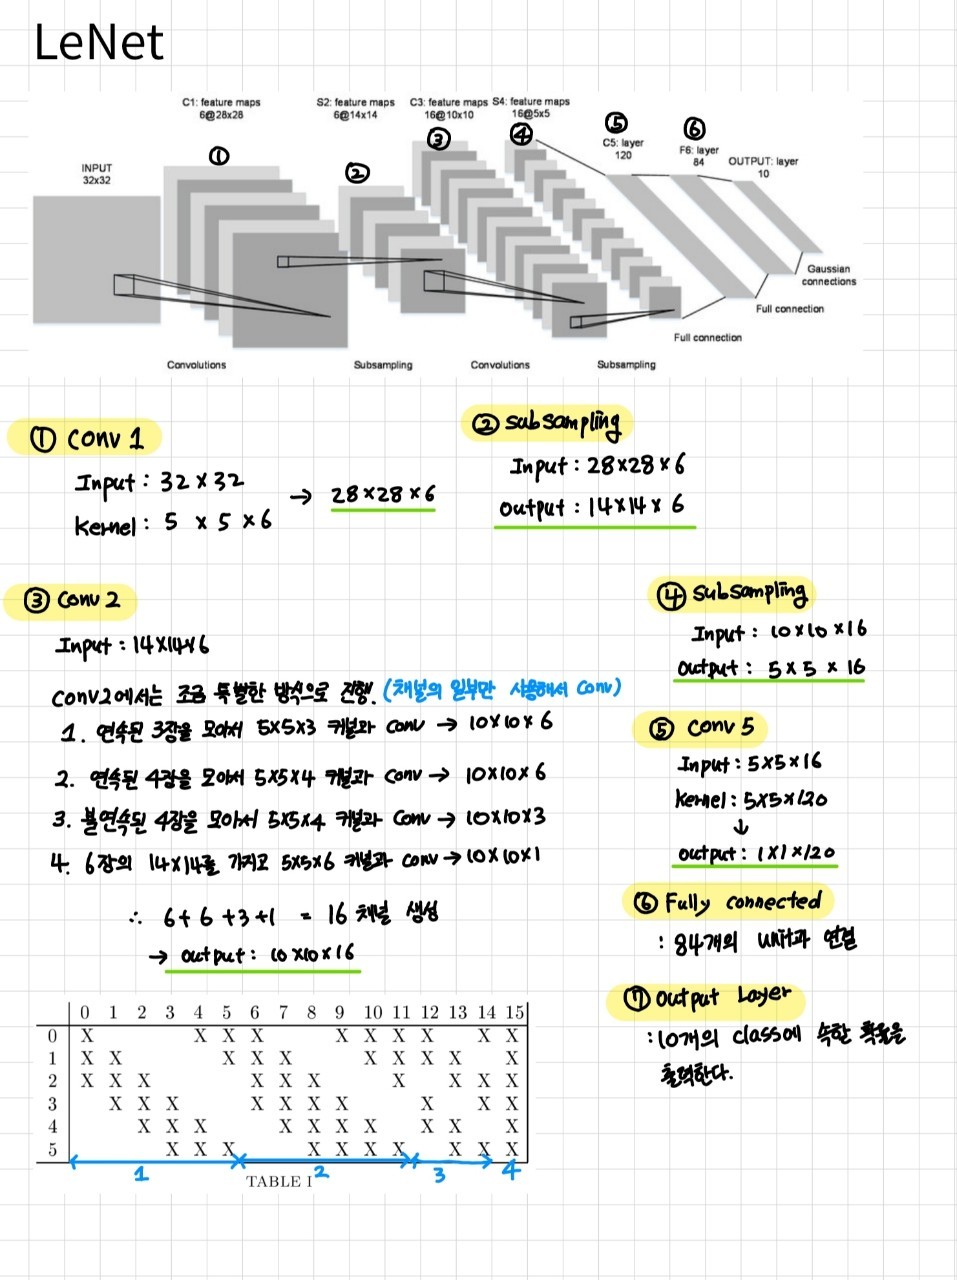

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F


from datetime import datetime
from torch import nn
from torch import optim
from torchvision import utils
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
from torchsummary import summary

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## 데이터 불러오기 및 처리
LeNet의 input size = 32x32이므로 Compose함수로 이를 처리

In [3]:
transforms = transforms.Compose([transforms.Resize((32,32)), # LeNet input size = 32x32
                                 transforms.ToTensor()])
train_dataset = datasets.MNIST(root='mnist_data', train=True, transform=transforms, download=True)
valid_dataset = datasets.MNIST(root='mnist_data', train=False, transform=transforms, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=32, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



Text(0.5, 0.98, 'MNIST DATASET - sample images')

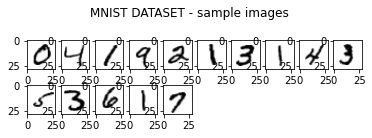

In [4]:
ROW = 10
nROW = 5
fig = plt.figure()
for idx in range(1, ROW + nROW + 1):
  plt.subplot(nROW, ROW, idx)
  plt.imshow(train_dataset.data[idx], cmap='gray_r')
fig.suptitle("MNIST DATASET - sample images")

## LeNet-5 모델 구축하기

In [28]:
# class LeNet(nn.Module):
#   def __init__(self):
#     super(LeNet, self).__init__()
#     self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1) # input channel = 1, output channel = 6
#     self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
#     self.conv3 = nn.Conv2d(16, 120, kernel_size=5, stride=1) # 여기까지가 feature 추출하는 부분
#     self.fc1 = nn.Linear(120, 84) # 선형 변환을 수행
#     self.fc2 = nn.Linear(84, 10)

#   def forward(self, x):
#     x = F.tanh(self.conv1(x))
#     x = F.max_pool2d(x, 2,2)
    
#     x = F.tanh(self.conv2(x))
#     x = F.max_pool2d(x, 2,2)
    
#     x = F.tanh(self.conv3(x))
#     x = torch.flatten(x, 1)
#     x = F.tanh(self.fc1(x))
#     x = self.fc2(x)
#     return x
class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        
        self.feature_extractor = nn.Sequential(            
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.Tanh()
        )

        self.classifier = nn.Sequential(
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=10),
        )


    def forward(self, x):
        x = self.feature_extractor(x)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        probs = F.softmax(logits, dim=1)
        return logits

In [29]:
model = LeNet().to(device)
summary(model, input_size=(1,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
              Tanh-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              Tanh-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
            Conv2d-7            [-1, 120, 1, 1]          48,120
              Tanh-8            [-1, 120, 1, 1]               0
            Linear-9                   [-1, 84]          10,164
             Tanh-10                   [-1, 84]               0
           Linear-11                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/ba

16:51:01 --- Epoch: 0	Train loss: 0.2342	Valid loss: 0.1003	Train accuracy: 96.95	Valid accuracy: 96.81
16:51:24 --- Epoch: 1	Train loss: 0.0847	Valid loss: 0.0690	Train accuracy: 98.23	Valid accuracy: 97.80
16:51:47 --- Epoch: 2	Train loss: 0.0580	Valid loss: 0.0635	Train accuracy: 98.58	Valid accuracy: 97.94
16:52:11 --- Epoch: 3	Train loss: 0.0441	Valid loss: 0.0502	Train accuracy: 98.95	Valid accuracy: 98.45
16:52:34 --- Epoch: 4	Train loss: 0.0365	Valid loss: 0.0459	Train accuracy: 99.03	Valid accuracy: 98.60
16:52:57 --- Epoch: 5	Train loss: 0.0307	Valid loss: 0.0456	Train accuracy: 99.26	Valid accuracy: 98.59
16:53:20 --- Epoch: 6	Train loss: 0.0260	Valid loss: 0.0416	Train accuracy: 99.46	Valid accuracy: 98.62
16:53:43 --- Epoch: 7	Train loss: 0.0235	Valid loss: 0.0481	Train accuracy: 99.50	Valid accuracy: 98.66
16:54:06 --- Epoch: 8	Train loss: 0.0214	Valid loss: 0.0482	Train accuracy: 99.42	Valid accuracy: 98.54
16:54:28 --- Epoch: 9	Train loss: 0.0176	Valid loss: 0.0418	Trai

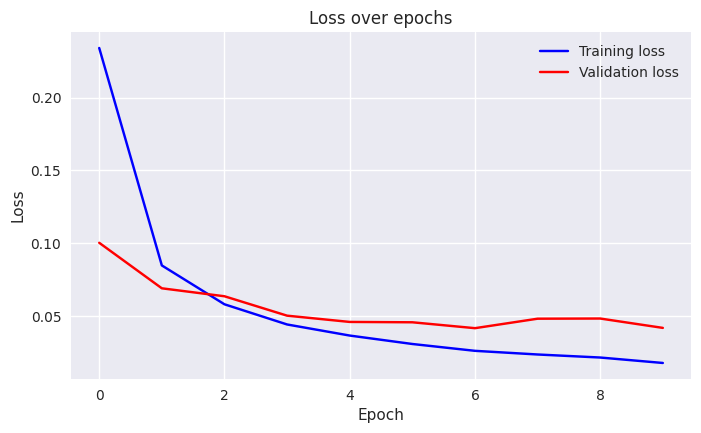

In [30]:
def train(model, optimizer, criterion, train_loader, device):
  model.train()
  avg_cost = 0
  for X, Y in train_loader:
    optimizer.zero_grad()
    X = X.to(device)
    Y = Y.to(device)
    H = model(X)
    
    cost = criterion(H, Y)
    avg_cost += cost.item()
    cost.backward()
    optimizer.step()
  # print("hi:",avg_cost / len(train_loader))
  return avg_cost / len(train_loader), model

def valid(model, criterion, valid_loader, device):
  model.eval()
  avg_cost = 0
  for X, Y in valid_loader:
    X = X.to(device)
    Y = Y.to(device)
    H = model(X)
    cost = criterion(H, Y)
    avg_cost += cost.item()
    
  return avg_cost / len(valid_loader), model

def get_acc(model, data_loader, device):
  pred = 0
  n = 0
  with torch.no_grad():
    model.eval()
    for X, Y in data_loader:
      X = X.to(device)
      Y = Y.to(device)
      H = model(X)

      correct_pred = (torch.argmax(H, 1) == Y).sum()
      pred += correct_pred
      n += Y.size(0)
  return pred.float() / n

def plot_losses(train_losses, valid_losses):
    plt.style.use('seaborn')
    # print("train loss:", train_losses)
    # print("valid loss:", valid_losses)
    train_losses = np.array(train_losses)
    valid_losses = np.array(valid_losses)

    fig, ax = plt.subplots(figsize = (8, 4.5))

    ax.plot(train_losses, color='blue', label='Training loss') 
    ax.plot(valid_losses, color='red', label='Validation loss')
    ax.set(title="Loss over epochs", 
            xlabel='Epoch',
            ylabel='Loss') 
    ax.legend()
    fig.show()
    
    plt.style.use('default')

  
def train_model(model, optimizer, criterion, train_loader, valid_loader, epochs, device, print_every=1):

  train_losses = []
  valid_losses = []
  for epoch in range(0, epochs):
     train_loss, model = train(model, optimizer, criterion, train_loader, device)
     train_losses.append(train_loss)

     with torch.no_grad():
       valid_loss, model = valid(model, criterion, valid_loader, device)
       valid_losses.append(valid_loss)
    
     if epoch % print_every == (print_every - 1):

       train_acc = get_acc(model, train_loader, device)
       valid_acc = get_acc(model, valid_loader, device)

       print(f'{datetime.now().time().replace(microsecond=0)} --- '
                  f'Epoch: {epoch}\t'
                  f'Train loss: {train_loss:.4f}\t'
                  f'Valid loss: {valid_loss:.4f}\t'
                  f'Train accuracy: {100 * train_acc:.2f}\t'
                  f'Valid accuracy: {100 * valid_acc:.2f}')
  plot_losses(train_losses, valid_losses)
  return model, optimizer, (train_losses, valid_losses)

optimizer = optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()
model, optimizer, _ = train_model(model, optimizer, criterion, train_loader, 
                                     valid_loader, 10, device)
